<a href="https://colab.research.google.com/github/Deveshrai02/EDA_Feature_Engineering_Learning/blob/main/Crop_Yeild_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [110]:
df = pd.read_csv('sample_data/crop_yield_dataset.csv')
df.sample(10)

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop,Yield_ton_per_ha
8925,Wheat,Region_D,Loam,7.31,1225.9,18.7,83.6,148.2,Sprinkler,49.3,22.2,Maize,112.37
8523,Rice,Region_C,Clay,6.47,1227.0,25.0,59.2,170.9,Flood,49.1,12.1,Wheat,121.20
8982,Rice,Region_D,Clay,6.38,1062.6,25.0,31.2,170.6,Flood,22.8,20.3,Barley,122.92
3929,Wheat,Region_D,Sandy,6.53,1224.0,29.9,71.5,66.8,Flood,6.2,7.0,Wheat,73.42
2131,Rice,Region_D,Clay,7.05,1103.7,21.5,88.2,141.0,Flood,4.7,14.3,Maize,109.14
25,Wheat,Region_A,Clay,5.99,1116.5,17.8,39.0,217.5,NaN,21.6,23.2,Barley,140.51
7905,Maize,Region_B,Sandy,5.91,636.6,23.9,68.1,189.2,Drip,9.3,14.8,Barley,114.32
7603,Rice,Region_B,Clay,6.72,782.8,24.2,33.8,163.9,Drip,31.6,6.4,Rice,107.78
2987,Maize,Region_A,Clay,7.17,535.1,26.9,86.3,214.9,Flood,24.9,14.8,Barley,130.93
7038,Barley,Region_A,Sandy,7.28,1202.2,34.1,62.8,60.2,Flood,46.4,5.7,Wheat,76.79


In [3]:
df.shape

(10000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                10000 non-null  object 
 1   Region              10000 non-null  object 
 2   Soil_Type           10000 non-null  object 
 3   Soil_pH             10000 non-null  float64
 4   Rainfall_mm         10000 non-null  float64
 5   Temperature_C       10000 non-null  float64
 6   Humidity_pct        10000 non-null  float64
 7   Fertilizer_Used_kg  10000 non-null  float64
 8   Irrigation          7462 non-null   object 
 9   Pesticides_Used_kg  10000 non-null  float64
 10  Planting_Density    10000 non-null  float64
 11  Previous_Crop       7969 non-null   object 
 12  Yield_ton_per_ha    10000 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1015.8+ KB


In [5]:
df.isnull().sum()

,0
Crop,0
Region,0
Soil_Type,0
Soil_pH,0
Rainfall_mm,0
Temperature_C,0
Humidity_pct,0
Fertilizer_Used_kg,0
Irrigation,2538
Pesticides_Used_kg,0


In [6]:
df.describe()


,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Pesticides_Used_kg,Planting_Density,Yield_ton_per_ha
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.516693,843.66467,24.975750,60.052550,175.083290,25.055500,14.997930,117.891105
std,0.574761,373.67076,5.790631,17.317097,71.964157,14.353483,5.833087,37.972664
min,5.500000,200.00000,15.000000,30.000000,50.000000,0.000000,5.000000,28.450000
25%,6.020000,518.00000,20.000000,45.100000,113.300000,12.600000,9.900000,87.135000
50%,6.520000,845.30000,24.900000,60.200000,175.000000,25.300000,15.000000,117.705000
75%,7.010000,1161.85000,30.100000,75.100000,237.900000,37.500000,20.100000,149.147500
max,7.500000,1499.70000,35.000000,90.000000,300.000000,50.000000,25.000000,207.210000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.corr(numeric_only=True)

,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Pesticides_Used_kg,Planting_Density,Yield_ton_per_ha
Soil_pH,1.000000,-0.013136,-0.015249,-0.009788,0.002719,0.005638,-0.011672,-0.002520
Rainfall_mm,-0.013136,1.000000,0.009170,0.001472,-0.000686,0.013530,0.001924,0.294182
Temperature_C,-0.015249,0.009170,1.000000,-0.011534,0.000781,-0.001114,0.013900,0.035878
Humidity_pct,-0.009788,0.001472,-0.011534,1.000000,0.005125,-0.016729,-0.008843,0.007116
Fertilizer_Used_kg,0.002719,-0.000686,0.000781,0.005125,1.000000,-0.006475,-0.000534,0.945808
Pesticides_Used_kg,0.005638,0.013530,-0.001114,-0.016729,-0.006475,1.000000,-0.002407,-0.003400
Planting_Density,-0.011672,0.001924,0.013900,-0.008843,-0.000534,-0.002407,1.000000,0.000458
Yield_ton_per_ha,-0.002520,0.294182,0.035878,0.007116,0.945808,-0.003400,0.000458,1.000000


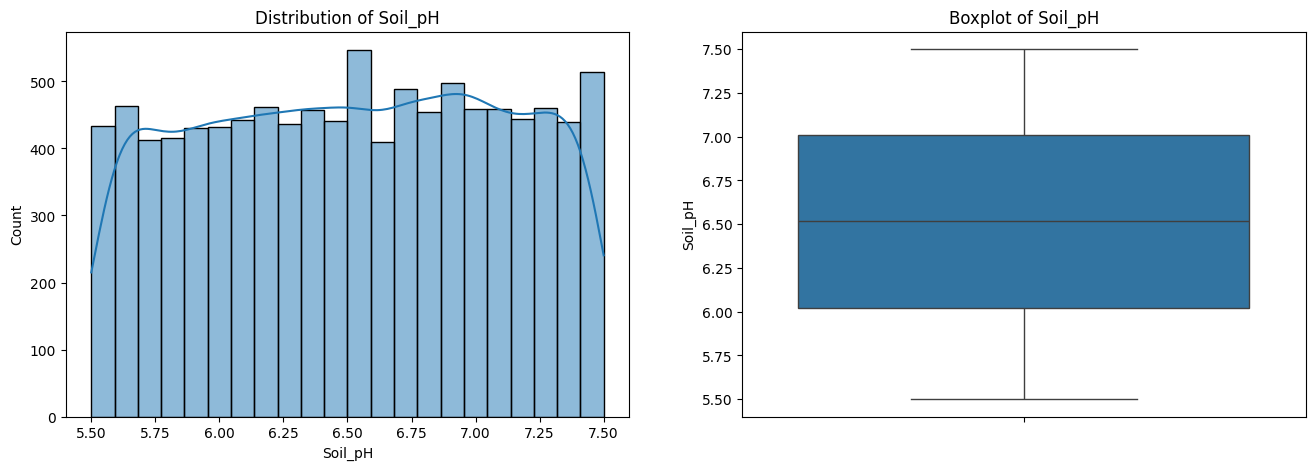

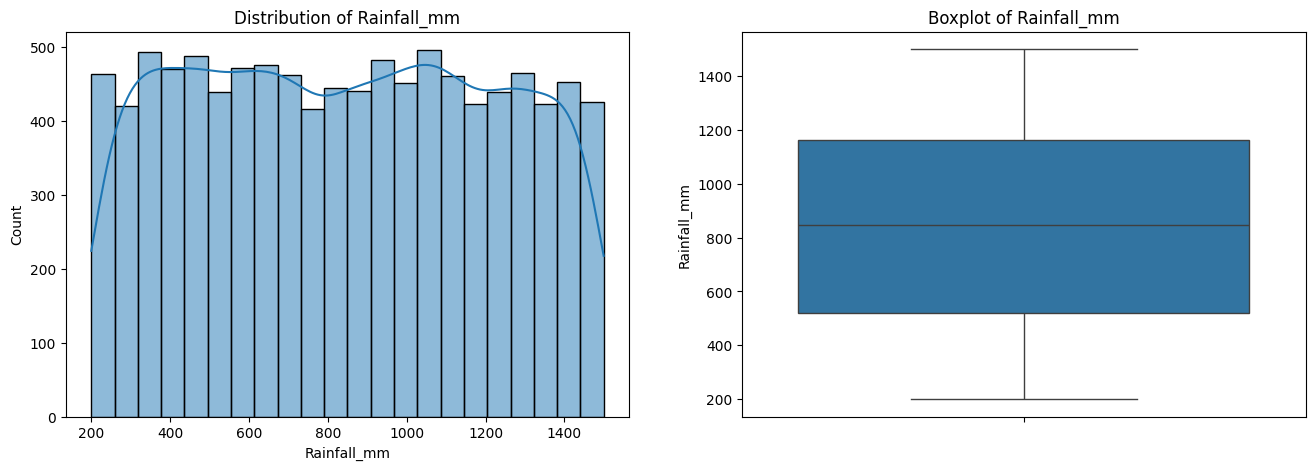

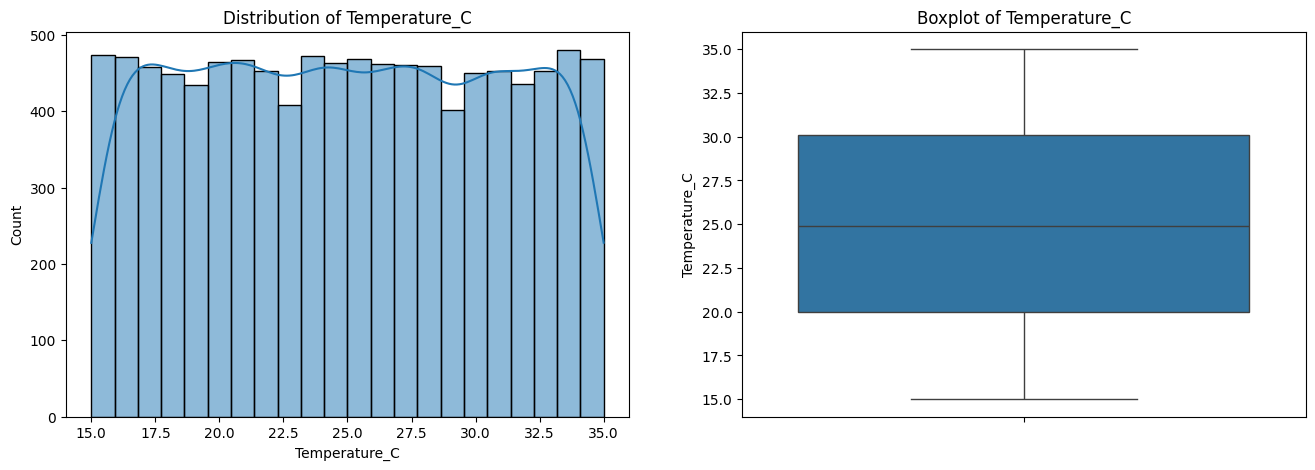

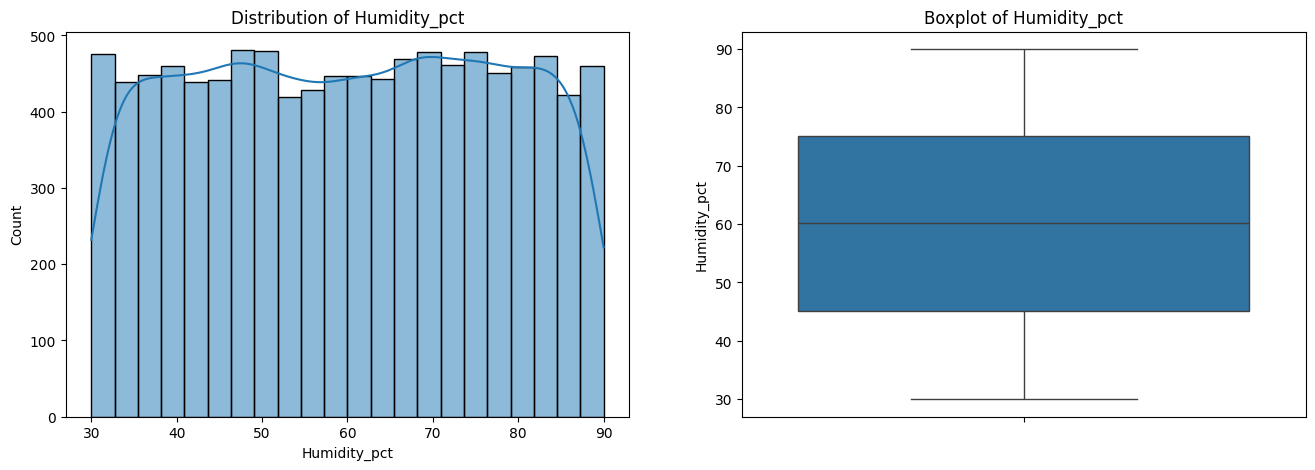

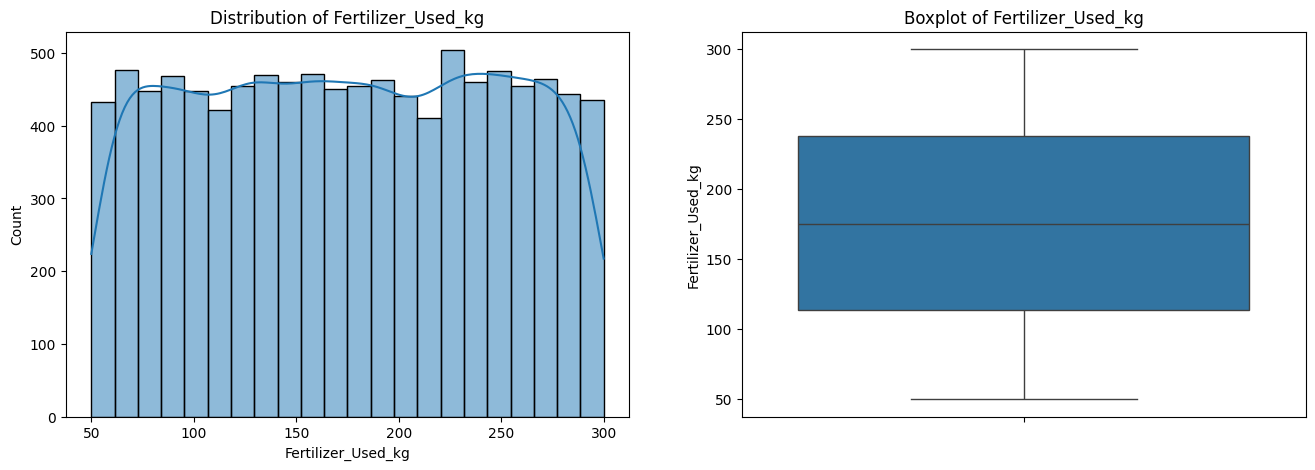

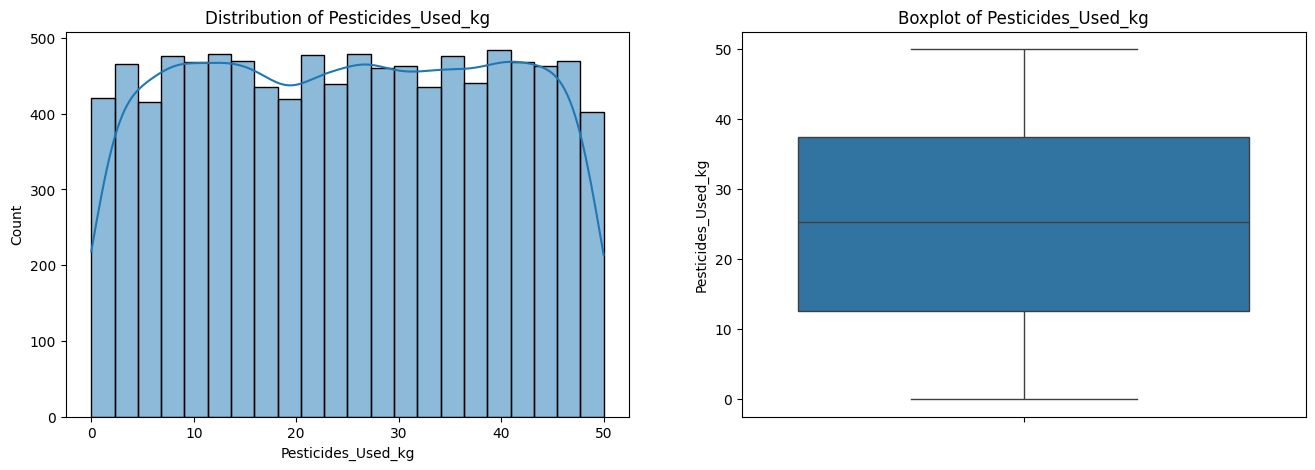

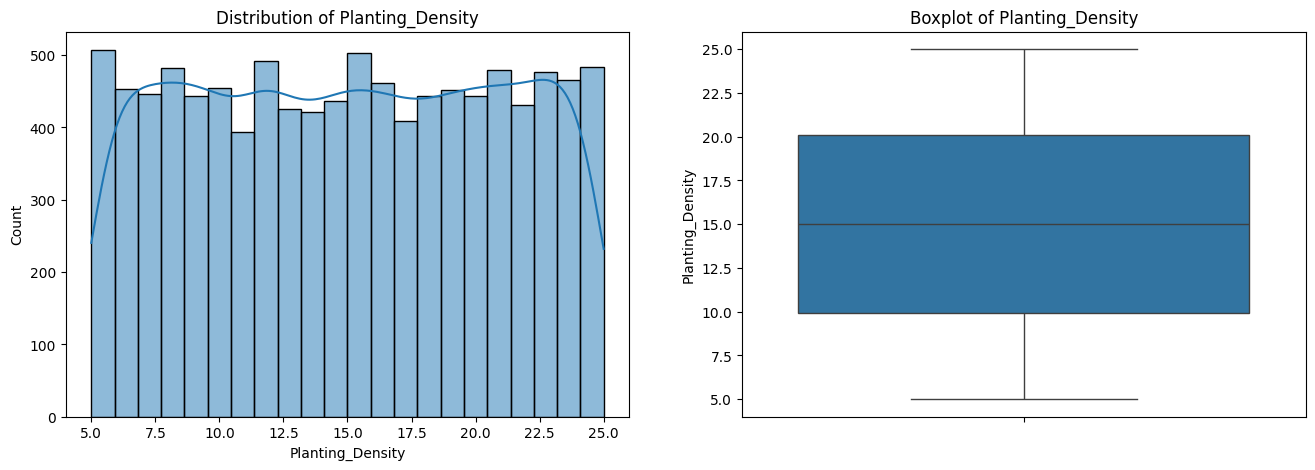

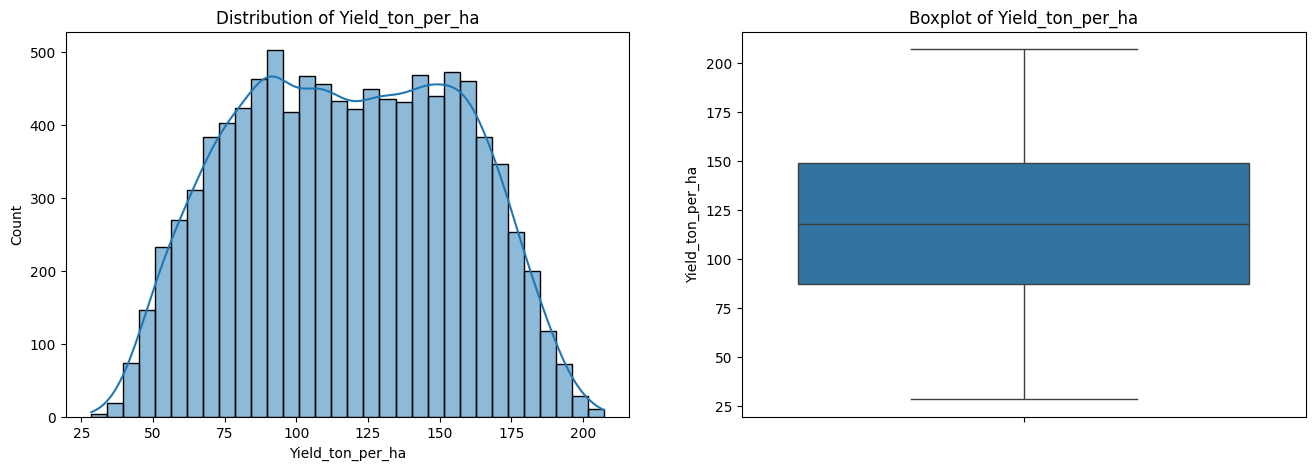

In [9]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True) # Using histplot with kde for distribution
    plt.title(f'Distribution of {col}')
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col]) # Using y for vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.show()

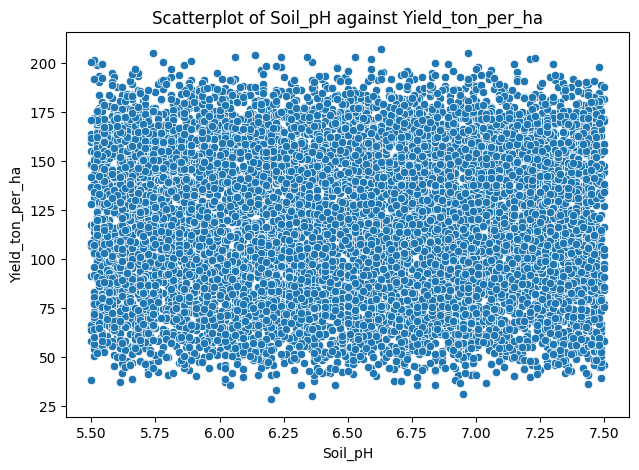

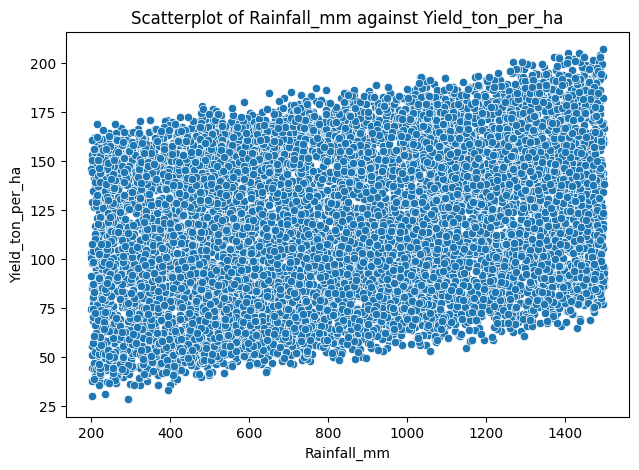

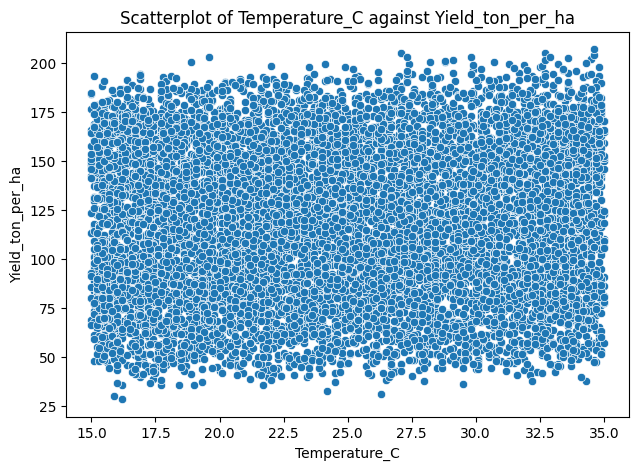

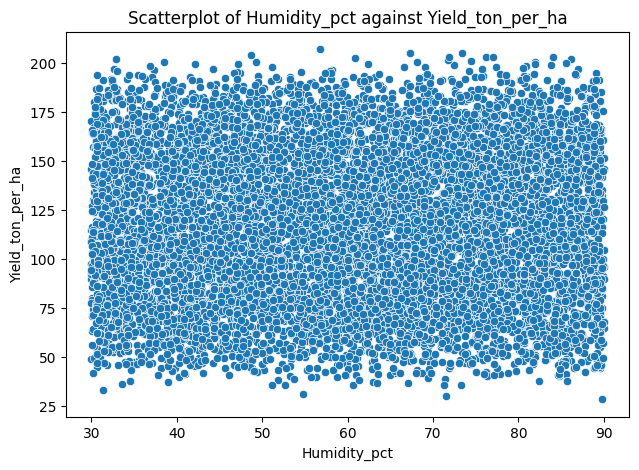

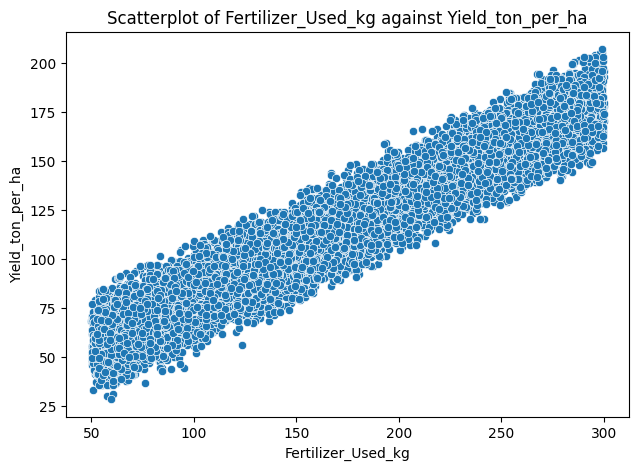

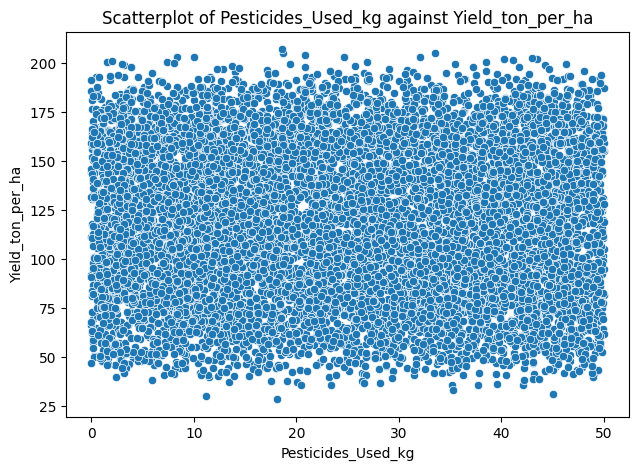

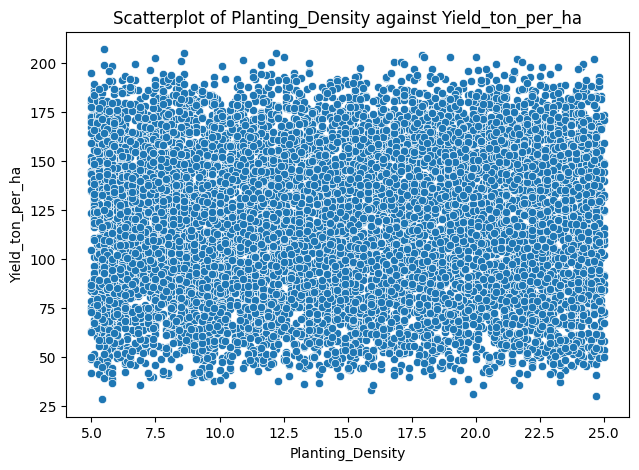

In [19]:
X=df.drop('Yield_ton_per_ha',axis=1)
y=df['Yield_ton_per_ha']

for col in X.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(16, 5))

    # Scatterplot
  plt.subplot(1, 2, 1)
  sns.scatterplot(x=X[col], y=y)
  plt.title(f'Scatterplot of {col} against Yield_ton_per_ha')
  plt.xlabel(f'{col}')
  plt.ylabel('Yield_ton_per_ha')


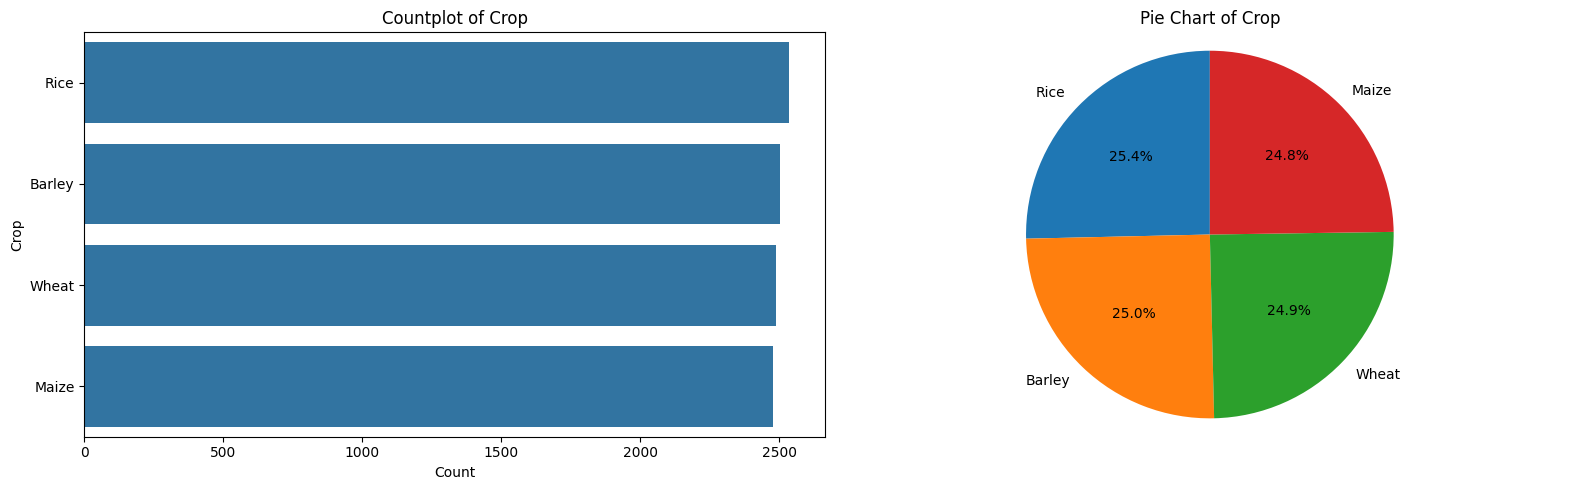

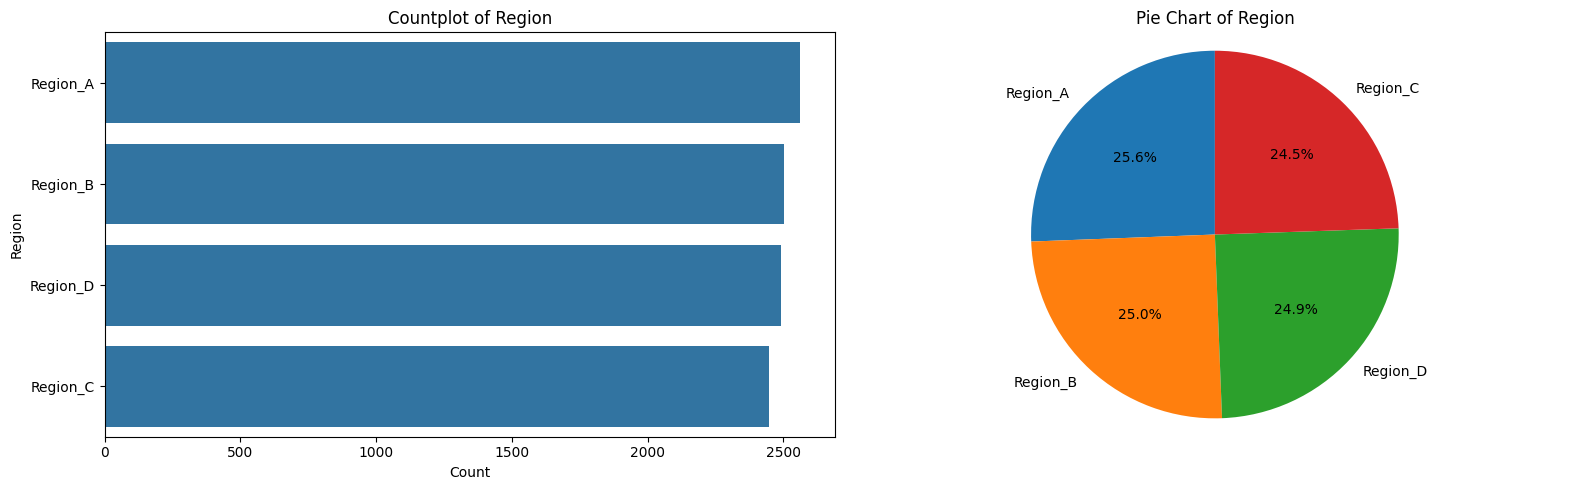

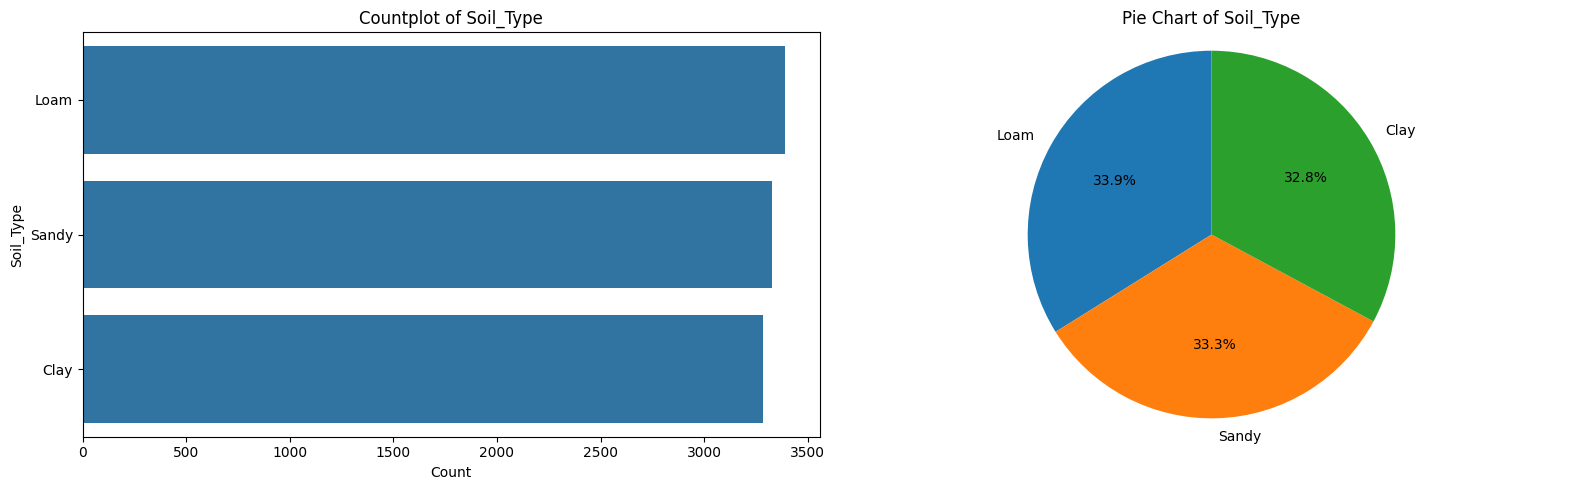

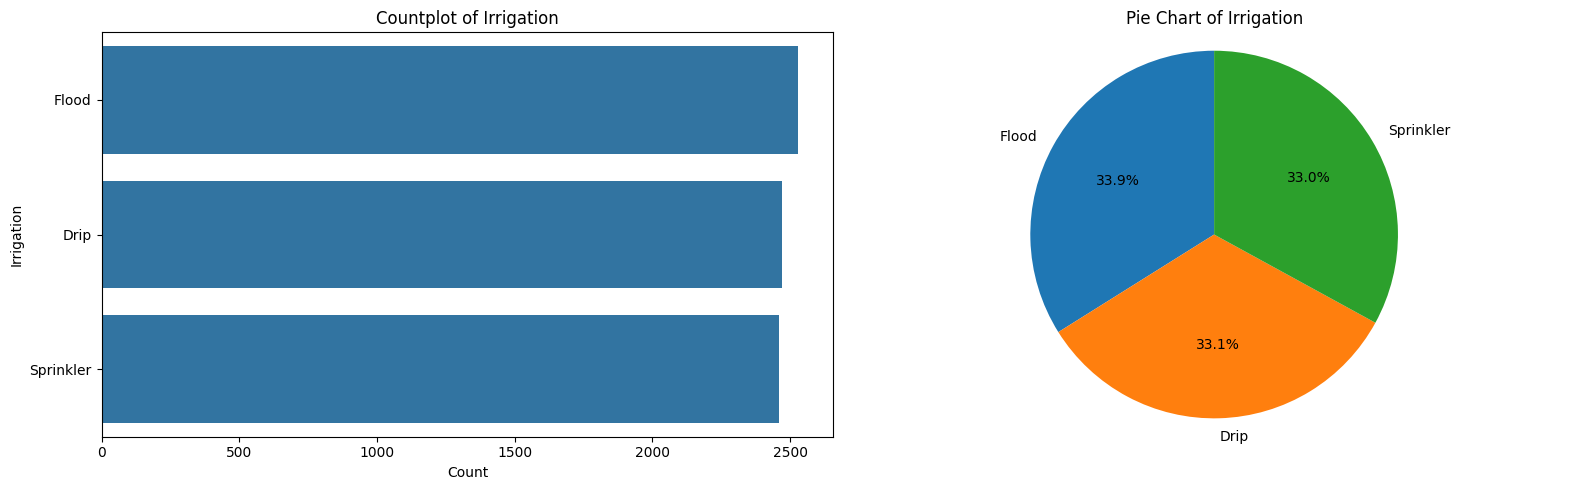

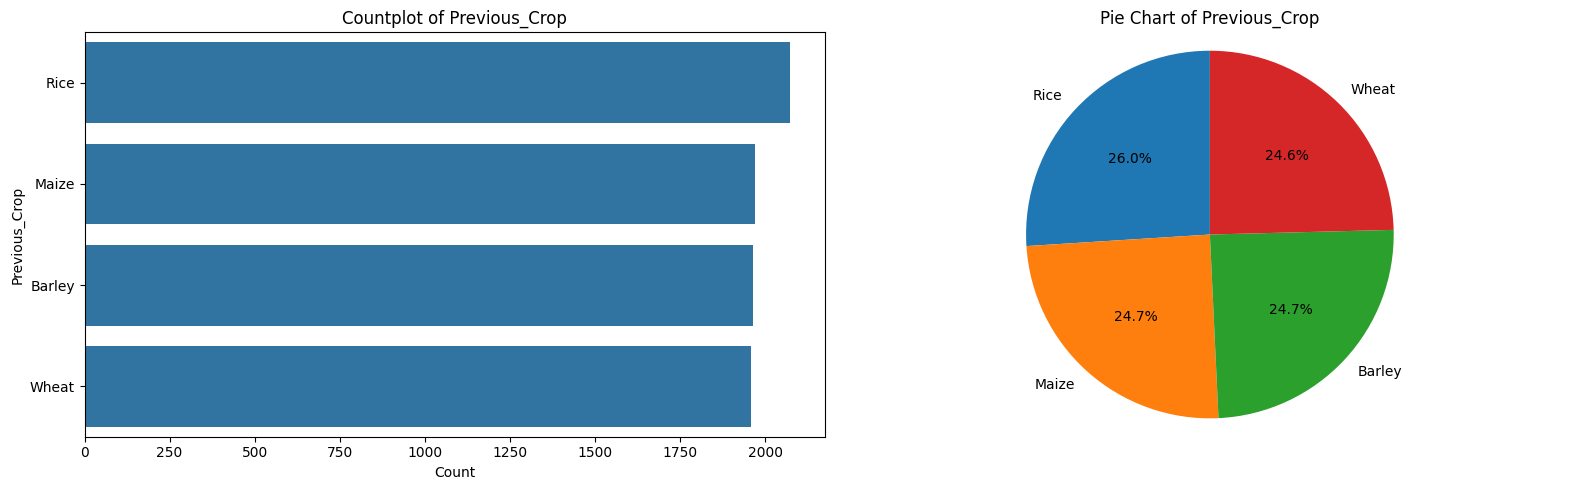

In [10]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(16, 5))

    # Countplot
    plt.subplot(1, 2, 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    # Pie chart
    plt.subplot(1, 2, 2)
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

### Distribution of `Yield_ton_per_ha` across Categorical Variables

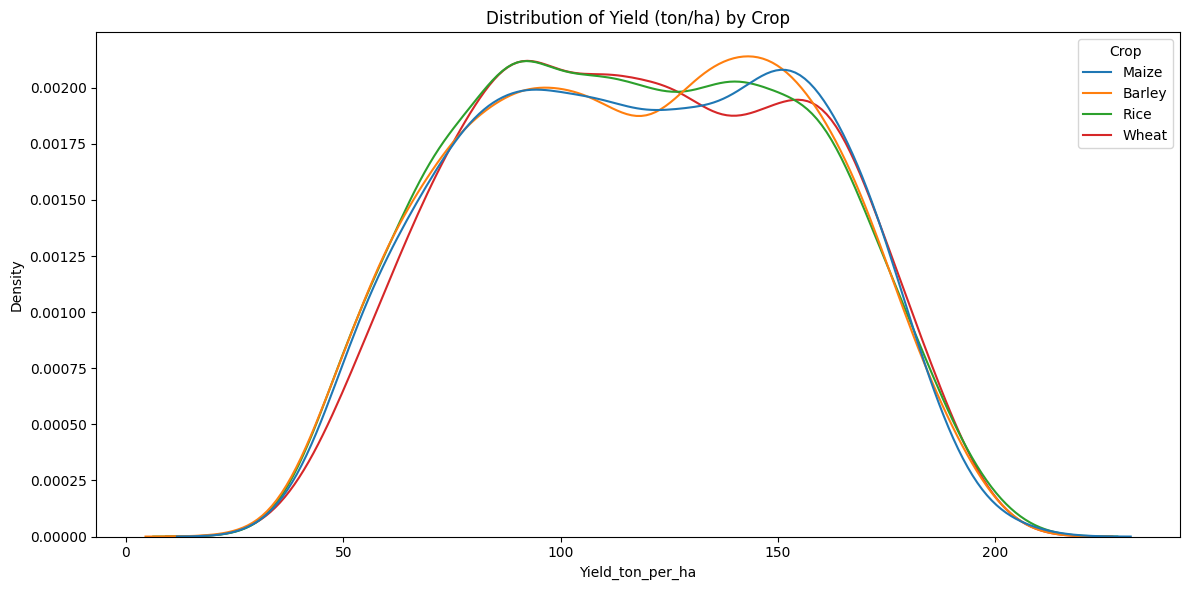

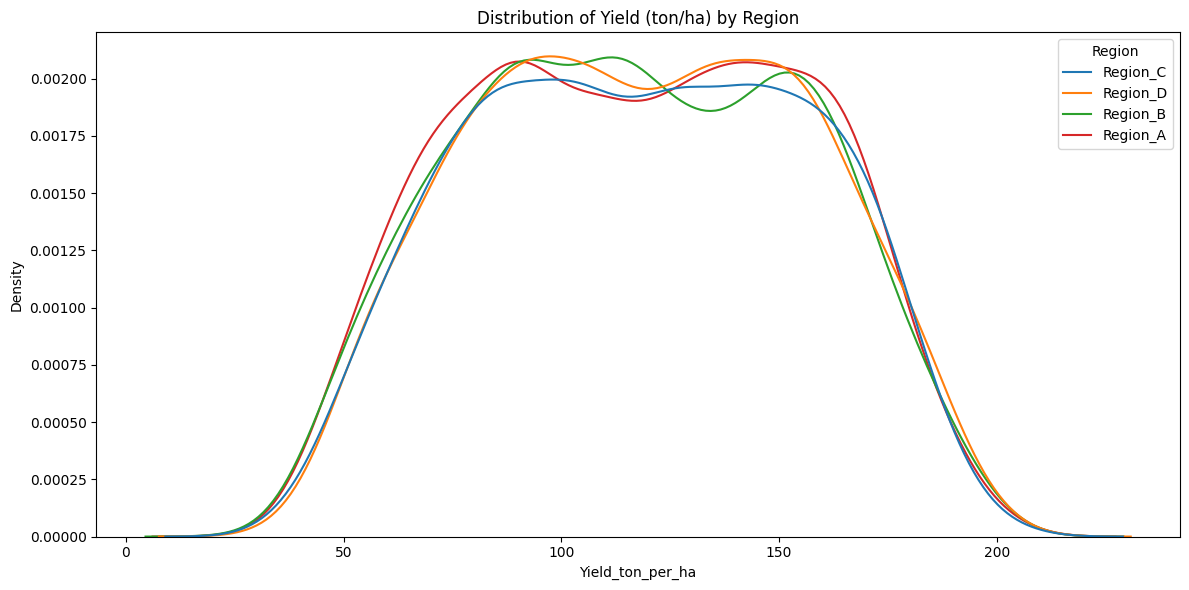

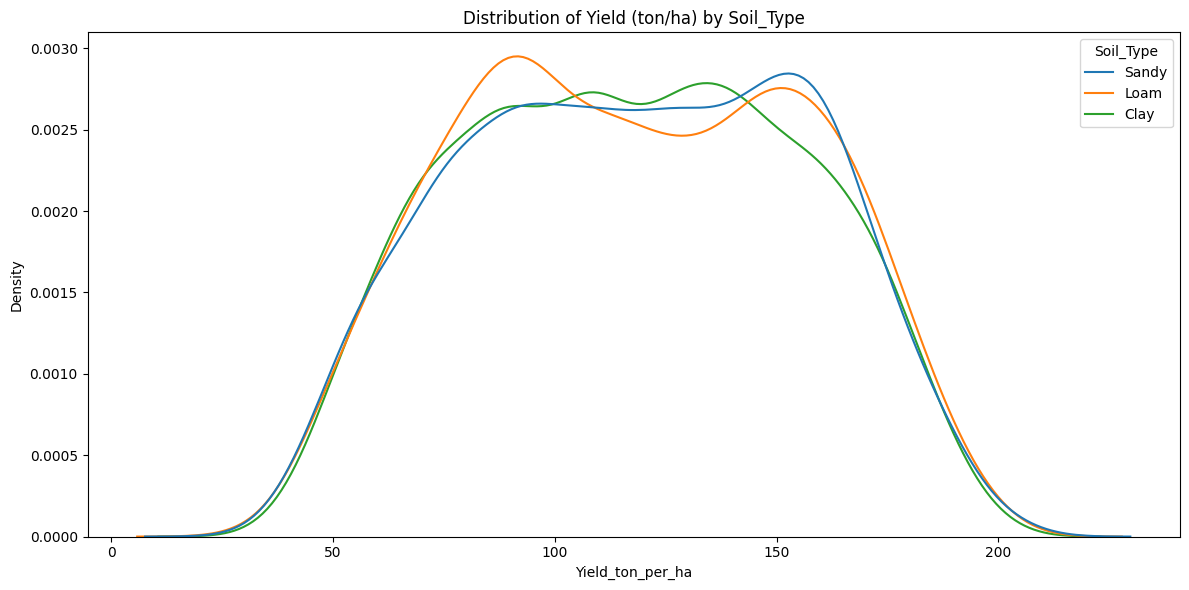

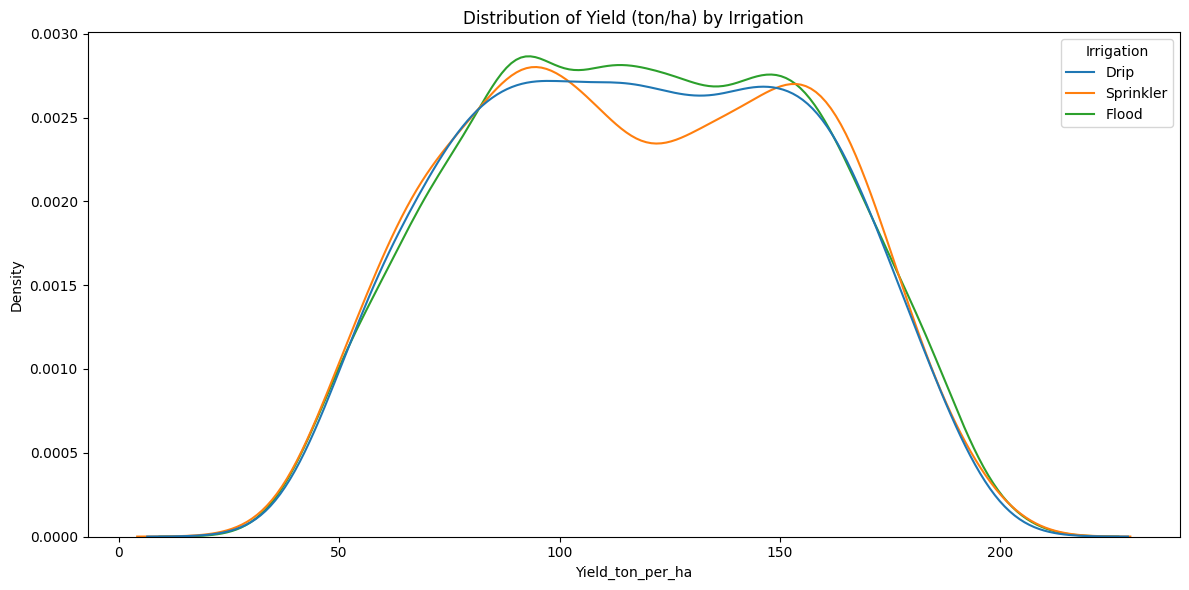

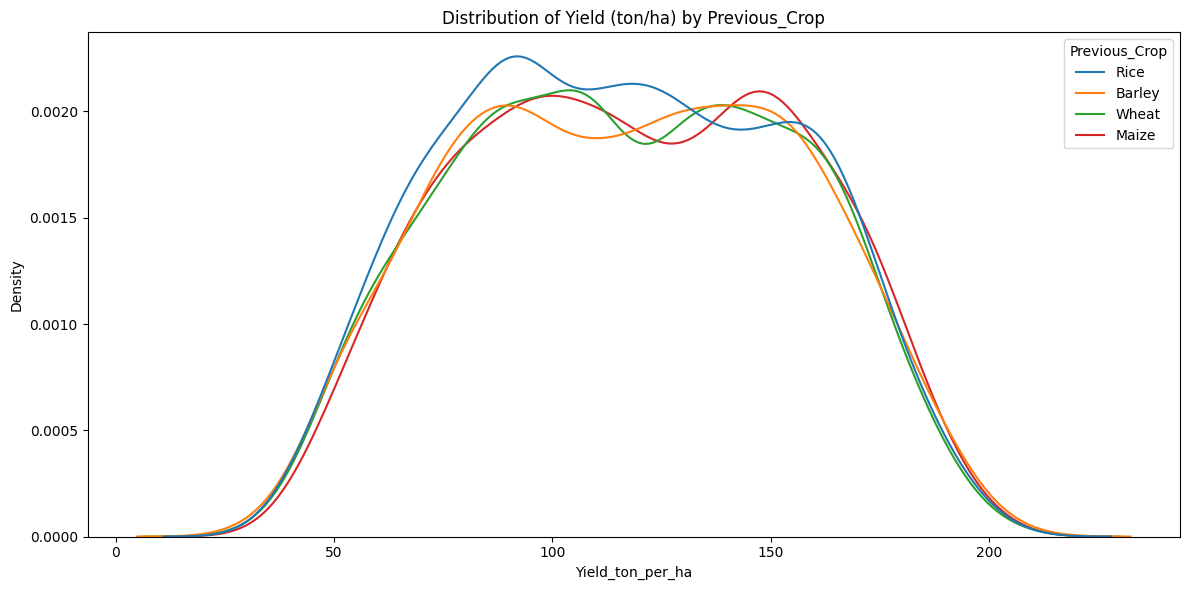

In [11]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(x='Yield_ton_per_ha', hue=col, data=df, fill=False)
    plt.title(f'Distribution of Yield (ton/ha) by {col}')
    plt.xlabel('Yield_ton_per_ha')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

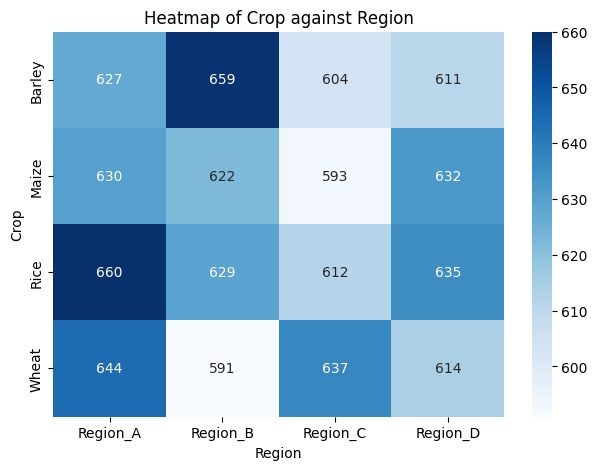

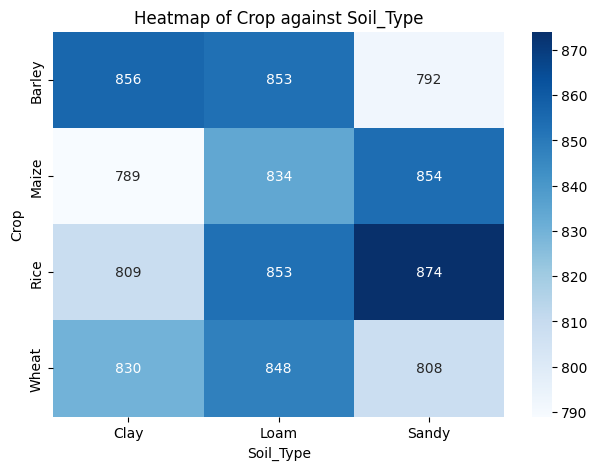

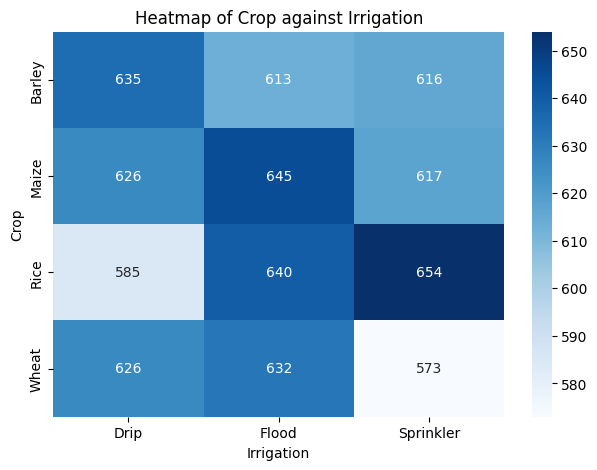

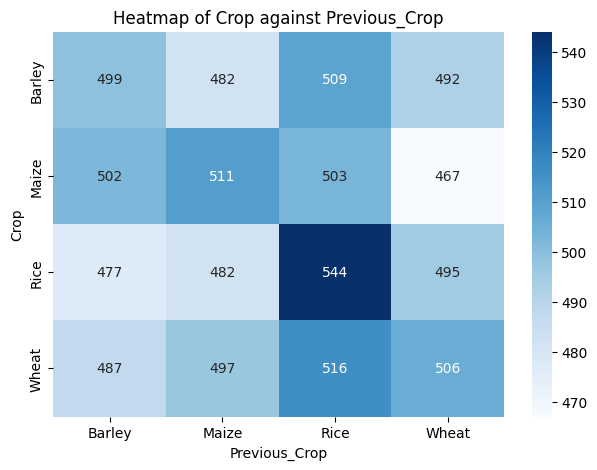

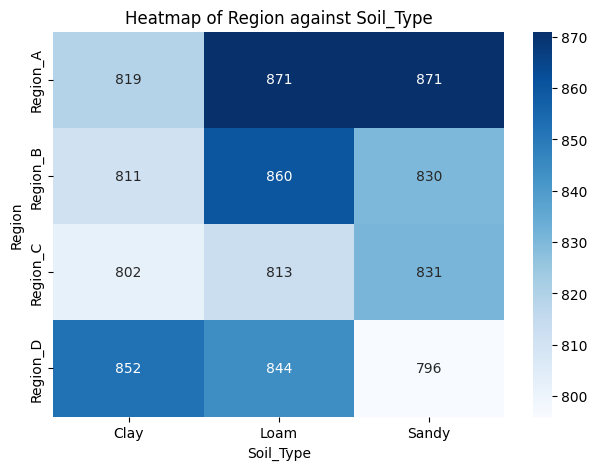

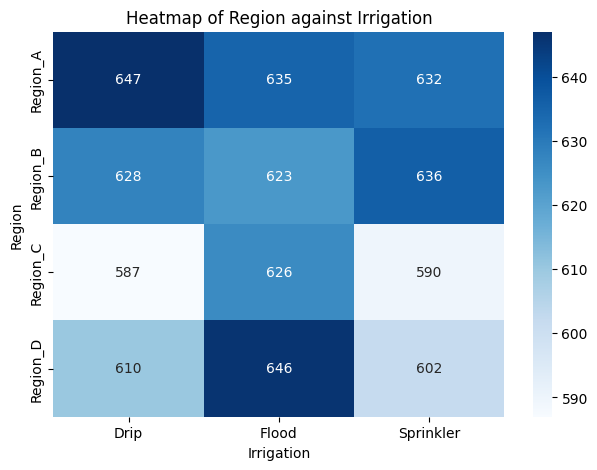

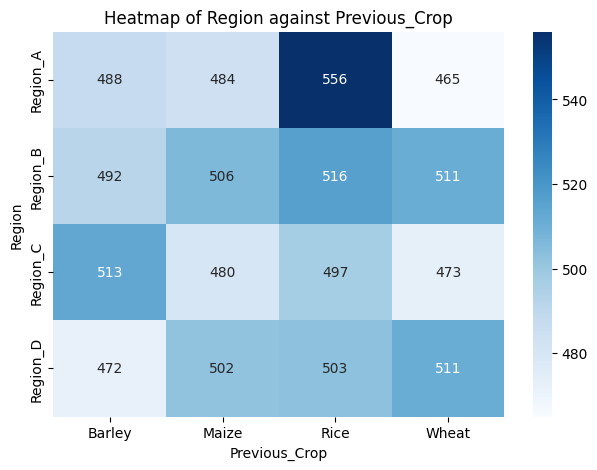

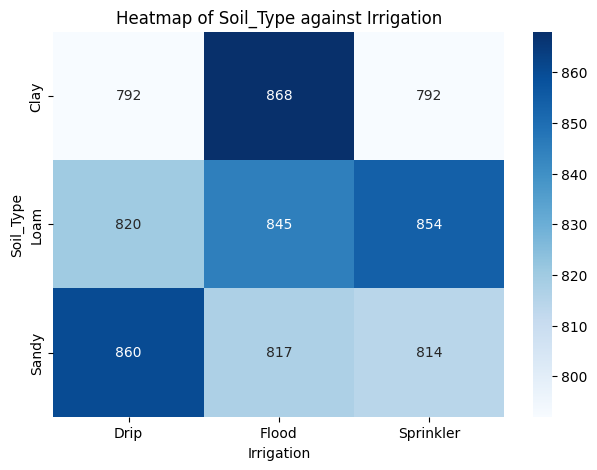

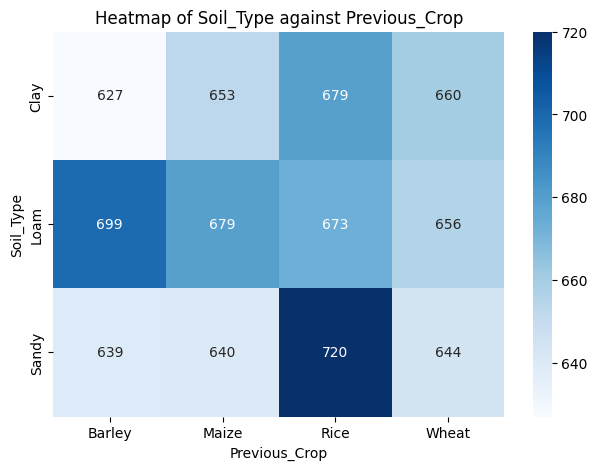

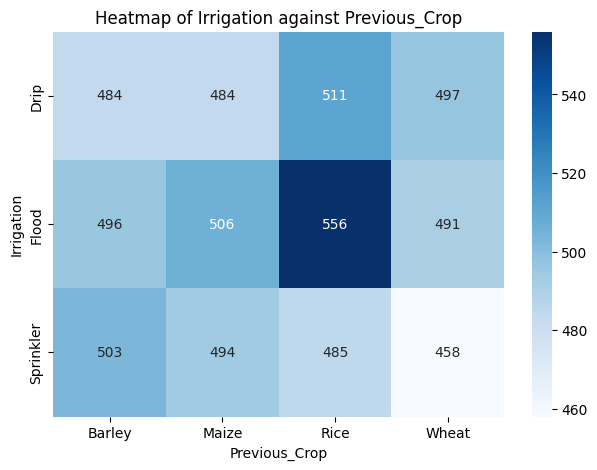

In [43]:
arr =np.array(df.select_dtypes(include='object').columns)
n= arr.size
for i in range(0,n):
    for j in range(i+1 , n):
        plt.figure(figsize=(16, 5))
        # Countplot
        plt.subplot(1, 2, 1)
        sns.heatmap(pd.crosstab(df[arr[i]], df[arr[j]]), annot=True, fmt='d', cmap='Blues')
        plt.title(f'Heatmap of {arr[i]} against {arr[j]}')
        plt.xlabel(f'{arr[j]}')
        plt.ylabel(f'{arr[i]}')


Imputing missing values
As around 25 percent value is missing for Irrigation and 20 ercent missing for previous crops we would analyse both imputer types - Replacing with mode and replacing with new category text - Missing


In [45]:
df.isnull().mean()*100

,0
Crop,0.00
Region,0.00
Soil_Type,0.00
Soil_pH,0.00
Rainfall_mm,0.00
Temperature_C,0.00
Humidity_pct,0.00
Fertilizer_Used_kg,0.00
Irrigation,25.38
Pesticides_Used_kg,0.00


<Axes: xlabel='Irrigation'>

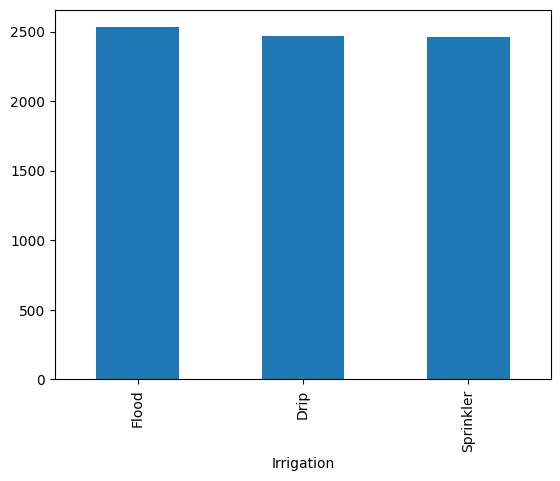

In [111]:
df['Irrigation'].value_counts().sort_values(ascending=False).plot.bar()

In [115]:
Irrigation_Mode= df['Irrigation'].mode().values[0]
Previous_Crop_Mode= df['Previous_Crop'].mode().values[0]
Irrigation_Mode , Previous_Crop_Mode

('Flood', 'Rice')

<Axes: xlabel='Irrigation'>

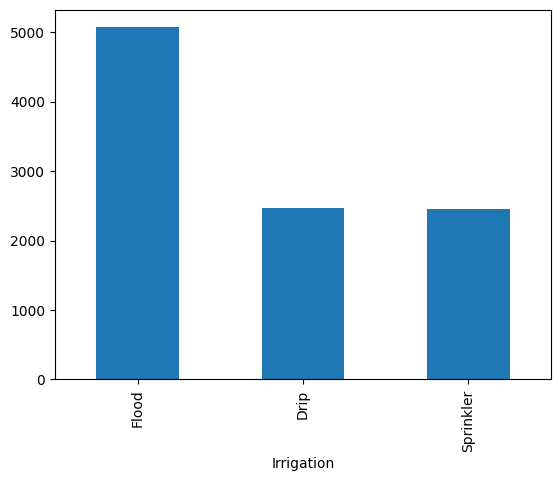

In [117]:
df['Irrigation'].fillna(Irrigation_Mode).value_counts().sort_values(ascending=False).plot.bar()

In [118]:
df['Irrigation'].fillna(Irrigation_Mode, inplace=True)
df['Previous_Crop'].fillna(Previous_Crop_Mode, inplace=True)
df.isnull().sum()

/tmp/ipython-input-3848409315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Irrigation'].fillna(Irrigation_Mode, inplace=True)
/tmp/ipython-input-3848409315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
Crop,0
Region,0
Soil_Type,0
Soil_pH,0
Rainfall_mm,0
Temperature_C,0
Humidity_pct,0
Fertilizer_Used_kg,0
Irrigation,0
Pesticides_Used_kg,0


In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Yield_ton_per_ha']),df['Yield_ton_per_ha'],test_size=0.2)

In [120]:
X_train.shape,X_test.shape

((8000, 12), (2000, 12))

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                10000 non-null  object 
 1   Region              10000 non-null  object 
 2   Soil_Type           10000 non-null  object 
 3   Soil_pH             10000 non-null  float64
 4   Rainfall_mm         10000 non-null  float64
 5   Temperature_C       10000 non-null  float64
 6   Humidity_pct        10000 non-null  float64
 7   Fertilizer_Used_kg  10000 non-null  float64
 8   Irrigation          7462 non-null   object 
 9   Pesticides_Used_kg  10000 non-null  float64
 10  Planting_Density    10000 non-null  float64
 11  Previous_Crop       7969 non-null   object 
 12  Yield_ton_per_ha    10000 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1015.8+ KB


In [121]:
transformer1 = ColumnTransformer(transformers=
    [('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['Crop','Region' , 'Soil_Type' , 'Irrigation' , 'Previous_Crop'])
],remainder='passthrough')

In [122]:
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Crop', 'Region', 'Soil_Type', 'Irrigation',
                                  'Previous_Crop'])])

In [128]:
X_train_transformed=transformer1.fit_transform(X_train)
X_test_transformed=transformer1.transform(X_test)

In [129]:
X_train_transformed.shape,X_test_transformed.shape

((8000, 20), (2000, 20))

In [130]:

print("First 5 rows of X_train_transformed after converting to int:")
print(X_train_transformed[:5, :])
print("\nData type of X_train_transformed after conversion:")
print(X_train_transformed.dtype)

First 5 rows of X_train_transformed after converting to int:
[[  0.     0.     1.     1.     0.     0.     1.     0.     1.     0.
    0.     1.     0.     7.32 980.3   17.4   51.2  146.4    2.6    7.3 ]
 [  0.     0.     0.     1.     0.     0.     1.     0.     0.     1.
    0.     0.     0.     5.58 922.6   24.1   57.6   76.3   10.1   11.9 ]
 [  0.     0.     1.     0.     0.     0.     1.     0.     1.     0.
    1.     0.     0.     5.99 799.6   25.1   82.1  120.6   19.2   18.4 ]
 [  0.     0.     0.     0.     0.     0.     0.     1.     0.     1.
    1.     0.     0.     6.68 390.3   30.6   47.8  161.1   44.3   11.7 ]
 [  0.     0.     1.     0.     0.     0.     0.     1.     0.     1.
    0.     0.     1.     6.53 463.6   22.7   42.2   71.7   17.7   23.9 ]]

Data type of X_train_transformed after conversion:
float64


In [131]:
print("First 5 rows of X_train_transformed after converting to int:")
print(X_test_transformed[:5, :])
print("\nData type of X_train_transformed after conversion:")
print(X_test_transformed.dtype)

First 5 rows of X_train_transformed after converting to int:
[[0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 7.1400e+00 1.3149e+03 2.4500e+01 5.0100e+01 5.7100e+01
  2.3000e+00 6.2000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 6.0700e+00 1.4445e+03 2.5900e+01 4.8300e+01 2.2800e+02
  2.5000e+01 1.7600e+01]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 6.9800e+00 4.7070e+02 2.0100e+01 4.3800e+01 2.4750e+02
  1.2200e+01 1.0500e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 5.5300e+00 1.3001e+03 2.9100e+01 3.6200e+01 1.4230e+02
  3.9500e+01 2.3000e+01]
 [0.0000e+00 0.0000e+00

In [132]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [133]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [134]:
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(X_test_transformed)

In [137]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 4.0674348786012064
MSE 26.115608987826192
R2 score 0.9820038381737392


In [138]:
import pandas as pd

# Create a sample DataFrame for prediction.
# Replace these values with your desired input data.
# Ensure all columns (except 'Yield_ton_per_ha') are present and in the correct order/data type.
new_data = pd.DataFrame({
    'Crop': ['Wheat'],
    'Region': ['Region_A'],
    'Soil_Type': ['Clay'],
    'Soil_pH': [6.5],
    'Rainfall_mm': [1200.0],
    'Temperature_C': [20.0],
    'Humidity_pct': [70.0],
    'Fertilizer_Used_kg': [150.0],
    'Irrigation': ['Sprinkler'],
    'Pesticides_Used_kg': [25.0],
    'Planting_Density': [10.0],
    'Previous_Crop': ['Maize']
})

display(new_data)

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop
0,Wheat,Region_A,Clay,6.5,1200.0,20.0,70.0,150.0,Sprinkler,25.0,10.0,Maize


In [139]:
# Transform the new input data using the already fitted transformer1
new_data_transformed = transformer1.transform(new_data)

print("Transformed new data shape:", new_data_transformed.shape)
print("First row of transformed new data:\n", new_data_transformed[0])

Transformed new data shape: (1, 20)
First row of transformed new data:
 [0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 1.0e+00 1.0e+00 0.0e+00 0.0e+00 6.5e+00 1.2e+03 2.0e+01 7.0e+01 1.5e+02
 2.5e+01 1.0e+01]


In [140]:
# Make a prediction using the trained linear regression model
prediction = lr.predict(new_data_transformed)

print(f"Predicted Yield (ton/ha): {prediction[0]:.2f}")

Predicted Yield (ton/ha): 114.98
